In [49]:
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())
digits.data

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
#UNSUPERVISED
x, y = digits.data, digits.target
scaler = StandardScaler()
dig_standardized = scaler.fit_transform(x)
embedding = Isomap(n_neighbors=8, n_components=2)
dig_transformed = embedding.fit_transform(dig_standardized)
dig_transformed.shape

(1797, 2)

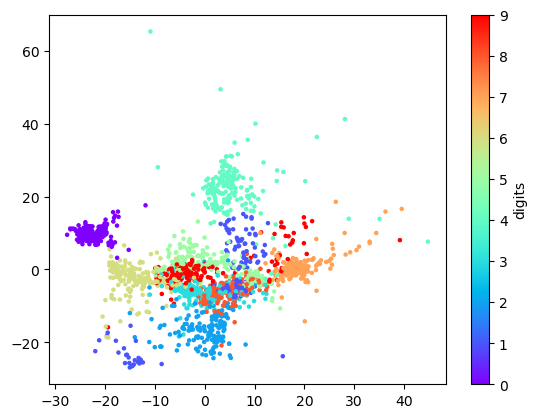

In [4]:
plt.scatter(dig_transformed[:, 0], dig_transformed[:, 1], c=y, cmap="rainbow", s=5)
plt.colorbar(label="digits")
#unsupervised, labels are just for names

In [34]:
#splitting: 80% of the images as tranining and 20% as a validation set
split_dig = train_test_split(dig_transformed, train_size=0.8)
split_targ = train_test_split(y, train_size=0.8)
#[0] is 80%, [1] is 20%

In [52]:
#SUPERVISED
#training
clf = LogisticRegression(random_state=0, solver="sag").fit(split_dig[0], split_targ[0])
train_predictions = clf.predict(split_dig[0])
clf.score(split_dig[0], split_targ[0])

0.11899791231732777

In [53]:
accuracy_score(split_targ[0], dig_predictions)

0.11899791231732777

In [54]:
#validation
val_predictions = clf.predict(split_dig[1])
clf.score(split_dig[1], split_targ[1])

0.08888888888888889

In [55]:
#training
confusion_matrix(split_targ[0], train_predictions)

array([[ 0,  0,  0, 32,  0, 87, 14,  0,  7,  0],
       [ 0,  0,  0, 39,  0, 90, 15,  0, 11,  0],
       [ 0,  0,  0, 34,  0, 77, 14,  0,  8,  0],
       [ 0,  0,  0, 50,  0, 78, 15,  0,  7,  0],
       [ 0,  0,  0, 38,  0, 84, 15,  0,  3,  0],
       [ 0,  0,  0, 38,  0, 89, 25,  0,  7,  0],
       [ 0,  0,  0, 30,  0, 85, 21,  0,  7,  0],
       [ 0,  0,  0, 39,  0, 74, 18,  0, 10,  0],
       [ 0,  0,  0, 31,  0, 72, 22,  0, 11,  0],
       [ 0,  0,  0, 32,  0, 82, 15,  0, 11,  0]], dtype=int64)

In [56]:
#validation
confusion_matrix(split_targ[1], val_predictions)

array([[ 0,  0,  0, 12,  0, 18,  6,  0,  2,  0],
       [ 0,  0,  0, 10,  0, 10,  6,  0,  1,  0],
       [ 0,  0,  0,  9,  0, 31,  2,  0,  2,  0],
       [ 0,  0,  0,  9,  0, 18,  4,  0,  2,  0],
       [ 0,  0,  0,  8,  0, 28,  4,  0,  1,  0],
       [ 0,  0,  0,  6,  0, 14,  3,  0,  0,  0],
       [ 0,  0,  0,  7,  0, 23,  7,  0,  1,  0],
       [ 0,  0,  0, 12,  0, 21,  2,  0,  3,  0],
       [ 0,  0,  0,  8,  0, 24,  4,  0,  2,  0],
       [ 0,  0,  0, 13,  0, 19,  4,  0,  4,  0]], dtype=int64)